<a href="https://colab.research.google.com/github/rkrissada/100DayOfMLCode/blob/master/day_055_airbnb_taipei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calendar = pd.read_csv('calendar.csv.gz')
print('We have', calendar.date.nunique(), 'days and', calendar.listing_id.nunique(), 'unique listings in the calendar data.')

We have 365 days and 9282 unique listings in the calendar data.


#### Calender

In [3]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,713379,2019-02-24,t,"$2,800.00","$2,800.00",2,90
1,68396,2019-02-24,f,"$1,539.00","$1,539.00",7,365
2,68396,2019-02-25,f,"$1,539.00","$1,539.00",7,365
3,68396,2019-02-26,f,"$1,539.00","$1,539.00",7,365
4,68396,2019-02-27,f,"$1,539.00","$1,539.00",7,365


In [4]:
calendar.date.min(), calendar.date.max()

('2019-02-24', '2020-02-23')

Calendar data covers one year time frame, that is, price and availability every day for the next one year.

In [5]:
calendar.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [6]:
calendar.shape

(3387930, 7)

In [7]:
calendar.available.value_counts()

t    1707935
f    1679995
Name: available, dtype: int64

f (false) means not available, t(true) means available.

Find out daily average availability for one year. Convert available column to 0 if available and 1 if not.

In [8]:
calendar_new = calendar[['date', 'available']]
calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)
calendar_new = calendar_new.groupby('date')['busy'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


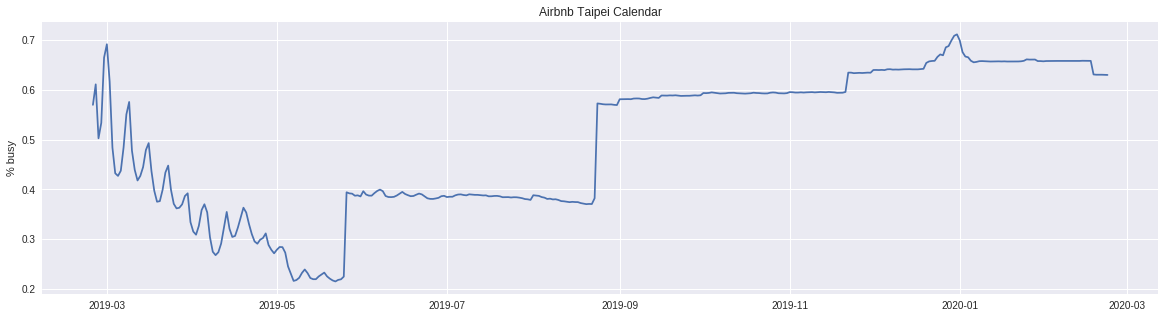

In [11]:
plt.figure(figsize=(20, 5))
plt.plot(calendar_new['date'], calendar_new['busy'])
plt.title('Airbnb Taipei Calendar')
plt.ylabel('% busy')
plt.show();

The busiest month in Taipei was March which has just passed.The next busy months seems after September and extend to the summer. These are all within our experience and expectations.

#### Price on the Calendar

Remove "$" symbol in price column and convert it to numeric, and convert date to datetime data type.

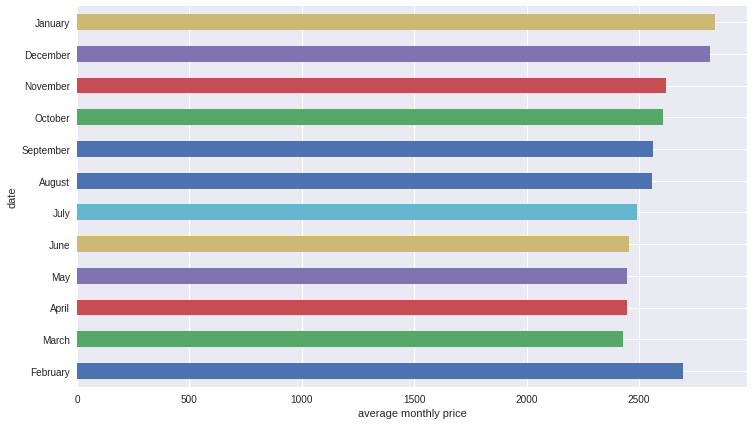

In [13]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].astype(float)
calendar['date'] = pd.to_datetime(calendar['date'])
mean_of_month = calendar.groupby(calendar['date'].dt.strftime('%B'),
                                 sort=False)['price'].mean()
mean_of_month.plot(kind = 'barh' , figsize = (12,7))
plt.xlabel('average monthly price');

The Airbnb price in Taipei increases in the months of Jan, Feb and Dec. Agreed, these three months are the best months visiting Taipei.

How price changes during day of week?

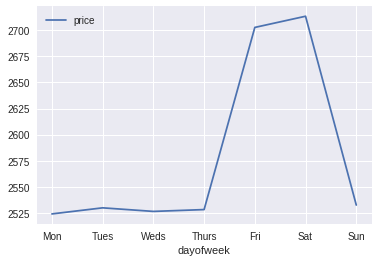

In [23]:
calendar['dayofweek'] = calendar.date.dt.weekday_name
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_week=calendar[['dayofweek','price']]
price_week=calendar.groupby(['dayofweek']).mean().reindex(cats)
price_week.drop('listing_id', axis=1, inplace=True)
price_week.drop('minimum_nights', axis=1, inplace=True)
price_week.drop('maximum_nights', axis=1, inplace=True)
#price_week
price_week.plot()
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels);

Fridays and Saturdays are over $170 more expensive than the rest of the week.

#### Listings

##### Number of listings in each neighbourhood

In [24]:
listings = pd.read_csv('listings.csv.gz')
print('We have', listings.id.nunique(), 'listings in the listing data.')

We have 9282 listings in the listing data.


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
listings.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False).head(10)

,id
neighbourhood_cleansed,
萬華區,2113
大安區,1648
中山區,1221
中正區,1217
信義區,987
大同區,676
松山區,410
士林區,315
北投區,214


The neighbourhood that has the highest number of listings is Wanhua (萬華), and quite same  the second most Da’an (大安). From map at Inside Airbnb, we can see that too.

#### review score rating

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


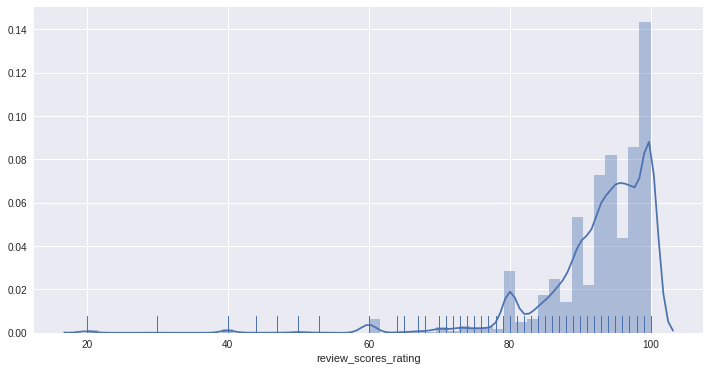

In [26]:
plt.figure(figsize=(12,6))
sns.distplot(listings.review_scores_rating.dropna(), rug=True)
sns.despine()
plt.show();

In [27]:
listings.review_scores_rating.describe()

count    7364.000000
mean       92.648153
std         8.445858
min        20.000000
25%        90.000000
50%        95.000000
75%        98.000000
max       100.000000
Name: review_scores_rating, dtype: float64


As expected, most of reviewers leave high scores.

#### Exploring the price

In [29]:
listings['price']

0        1539.0
1         923.0
2        1539.0
3        1293.0
4         400.0
5        4001.0
6        3232.0
7        1539.0
8        1385.0
9        2555.0
10       1724.0
11        308.0
12       1323.0
13       2770.0
14       1385.0
15       2031.0
16       1231.0
17       2001.0
18       2185.0
19       2585.0
20       1508.0
21       1693.0
22        462.0
23        339.0
24       2616.0
25        862.0
26        923.0
27        923.0
28        923.0
29       2801.0
         ...   
9252    27700.0
9253     1231.0
9254     2401.0
9255      985.0
9256     2185.0
9257      585.0
9258      893.0
9259     3601.0
9260      985.0
9261     1785.0
9262      585.0
9263      585.0
9264    38011.0
9265      308.0
9266      400.0
9267     5509.0
9268     1200.0
9269      585.0
9270      985.0
9271     1293.0
9272      985.0
9273     1600.0
9274     1785.0
9275     1447.0
9276     1046.0
9277     1262.0
9278      585.0
9279     2985.0
9280     3509.0
9281     2185.0
Name: price, Length: 928

In [35]:
#listings['price'] = listings['price'].str.replace(',', '')
#listings['price'] = listings['price'].str.replace('$', '')
#listings['price'] = listings['price'].astype(float)

pd.options.display.float_format = "{:.2f}".format
listings['price'].describe()

count      9282.00
mean       2596.12
std       13750.92
min          62.00
25%         985.00
50%        1508.00
75%        2493.00
max     1000008.00
Name: price, dtype: float64

In [38]:
listings.loc[listings['price'] == 1000008.00]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5088,22274687,https://www.airbnb.com/rooms/22274687,20190224153854,2019-02-24,Japanese house in Zhongshan Area,"If you like japanese lifestyle, that's what yo...","席地而坐的風俗原始於唐朝,後來在傳入氣候較寒冷且甚產木材的日本後,便融合產生出了這種以書齋兼...","If you like japanese lifestyle, that's what yo...",none,# 5Mins' Walk 1. Zhongshan Elementary School S...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.00


The most expensive Airbnb listing in Taipei is at $1000008.00/night. From the listing url, it seems legitimate as far as I can tell. 	https://www.airbnb.com/rooms/22274687. A Japanese house in Zhongshan Area.

In [39]:
listings.iloc[np.argmax(listings['price'])]

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


id                                                                                       22274687
listing_url                                                 https://www.airbnb.com/rooms/22274687
scrape_id                                                                          20190224153854
last_scraped                                                                           2019-02-24
name                                                             Japanese house in Zhongshan Area
summary                                         If you like japanese lifestyle, that's what yo...
space                                           席地而坐的風俗原始於唐朝,後來在傳入氣候較寒冷且甚產木材的日本後,便融合產生出了這種以書齋兼...
description                                     If you like japanese lifestyle, that's what yo...
experiences_offered                                                                          none
neighborhood_overview                           # 5Mins' Walk 1. Zhongshan Elementary School S...
notes               

In [49]:
listings.loc[listings['price'] <= 3000]['price'].describe()

count   7717.00
mean    1444.79
std      670.31
min       62.00
25%      954.00
50%     1323.00
75%     1877.00
max     2985.00
Name: price, dtype: float64

In [43]:
listings.loc[listings['price'] == 0]['price'].count()

0

#### Listings price distribution after removing outliers

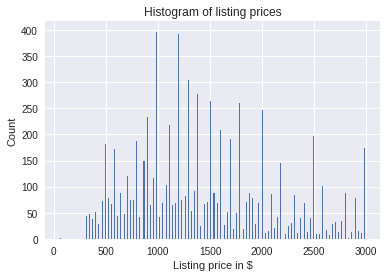

In [51]:
listings.loc[(listings.price <= 3000) & (listings.price > 0)].price.hist(bins=300)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices');

#### Neighbourhood vs. Price

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


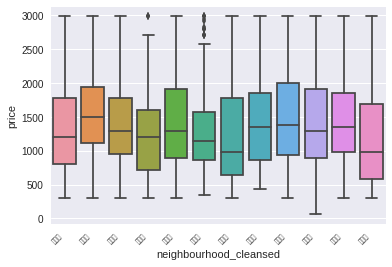

In [53]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood_cleansed', data=listings.loc[(listings.price <= 3000) & (listings.price > 0)], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

#### host vs. price

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


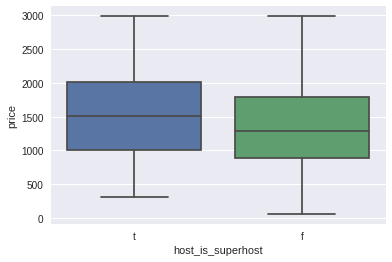

In [55]:
sns.boxplot(y='price', x='host_is_superhost', data=listings.loc[(listings.price <= 3000) & (listings.price > 0)])
plt.show();

Super host does enjoy a little higher median price than normal host.

#### property type vs. price

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


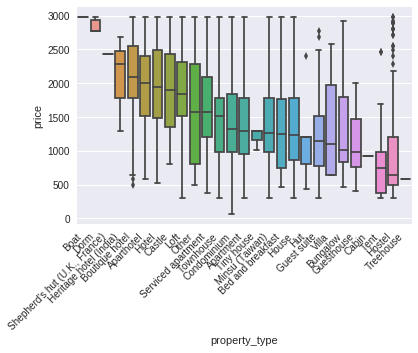

In [58]:
sort_price = listings.loc[(listings.price <= 3000) & (listings.price > 0)]\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='property_type', data=listings.loc[(listings.price <= 3000) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

When we look at the median price for each property type, we have to be careful that we can't say "The most expensive property type is Boat, and that Shepherd's hut have a higher median price than Boutique Hotel and Hotel.", because Boat, and Shepherd's hut has only one listing each.

In [59]:
listings.property_type.value_counts()

Apartment                        5366
Condominium                      1078
Hostel                            506
House                             413
Serviced apartment                373
Loft                              340
Boutique hotel                    295
Other                             172
Guest suite                       132
Bed and breakfast                 129
Townhouse                         117
Minsu (Taiwan)                    108
Hotel                              79
Aparthotel                         71
Guesthouse                         28
Bungalow                           18
Tent                               17
Dorm                               11
Villa                              10
Hut                                 5
Heritage hotel (India)              3
Tiny house                          3
Boat                                2
Castle                              2
Resort                              1
Cabin                               1
Treehouse   

#### room type vs. price

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


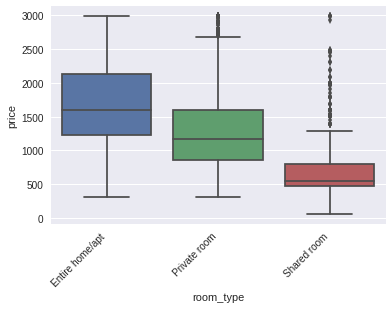

In [60]:
sort_price = listings.loc[(listings.price <= 3000) & (listings.price > 0)]\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=listings.loc[(listings.price <= 3000) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

This goes without saying, entire room/apt has a a much higher median price than the other room types

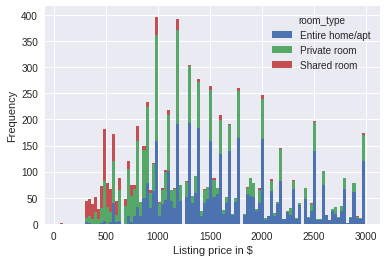

In [62]:
listings.loc[(listings.price <= 3000) & (listings.price > 0)].pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=100)
plt.xlabel('Listing price in $');

Entire home/apt also has the most number of listings. Inside Airbnb has indicated that Entire homes or apartments highly available year-round for tourists, probably don't have the owner present, could be illegal, and more importantly, are displacing residents. We will put our worries away for the moment.

#### bed type vs. price

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


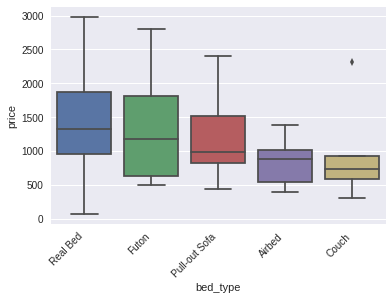

In [63]:
sort_price = listings.loc[(listings.price <= 3000) & (listings.price > 0)]\
                    .groupby('bed_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='bed_type', data=listings.loc[(listings.price <= 3000) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

#### Amenities

In [0]:
listings.amenities = listings.amenities.str.replace("[{}]", "").str.replace('"', "")

In [66]:
listings['amenities'].head()

0    TV,Cable TV,Internet,Wifi,Air conditioning,Whe...
1    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
2    TV,Cable TV,Internet,Wifi,Air conditioning,Pai...
3    TV,Cable TV,Internet,Wifi,Air conditioning,Pai...
4    Cable TV,Internet,Wifi,Air conditioning,Wheelc...
Name: amenities, dtype: object

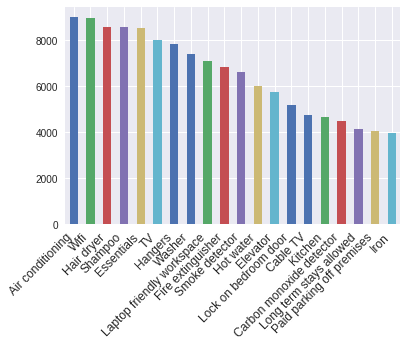

In [67]:
pd.Series(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(20)\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

AC, Wifi, Hair dryer, Shampoo and Essentials etc are among the most common amenities.

#### Amenities vs. price top 20

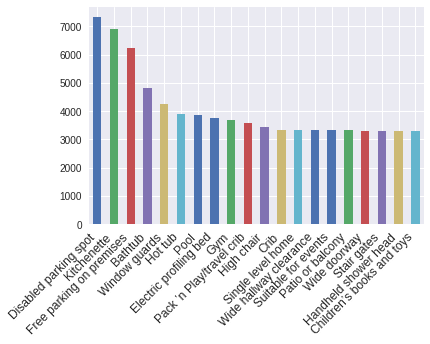

In [68]:
amenities = np.unique(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))
amenity_prices = [(amn, listings[listings['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])

amenity_srs.sort_values(ascending=False)[:20].plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

Interesting, amenities feature does seem to have some relationship with price.

#### Number of beds vs. price

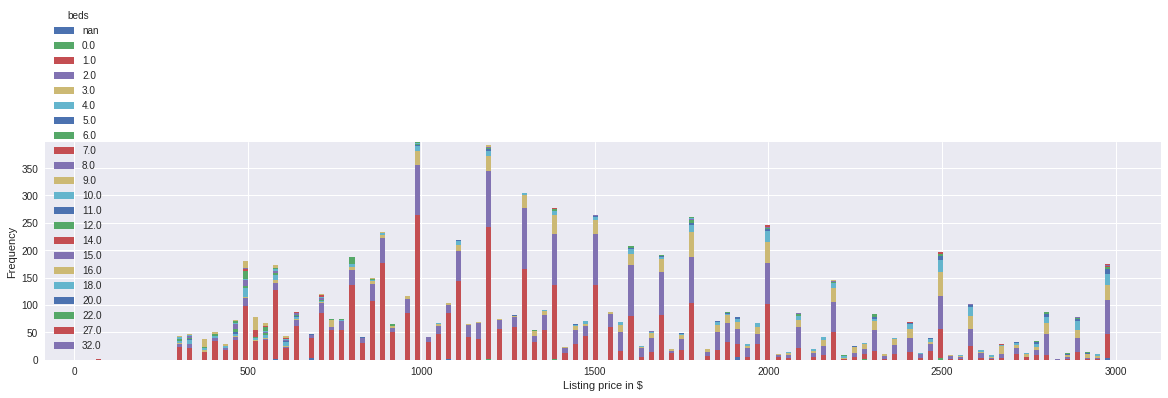

In [87]:
listings.loc[(listings.price <= 3000) & (listings.price > 0)].pivot(columns = 'beds',values = 'price').plot.hist(stacked = True,bins=200)
plt.rcParams["figure.figsize"] = (20,2)
plt.xlabel('Listing price in $');

Vast majority of the listings have one bed, the one-bed listing prices have a very wide range. There are listings that have no bed.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


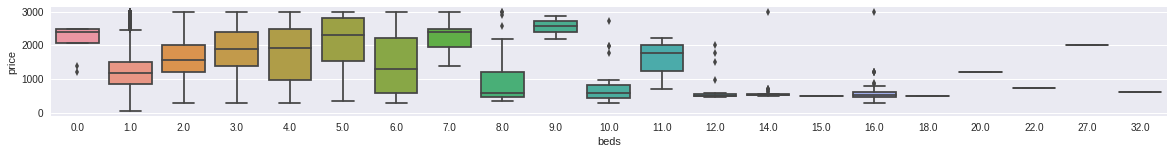

In [88]:
sns.boxplot(y='price', x='beds', data = listings.loc[(listings.price <= 3000) & (listings.price > 0)])
plt.show();

Interesting to discover that the median price for no bed listings is higher than 1-bed and 2-bed listings, and median price for 8-bed listings is very low.

#### numeric features

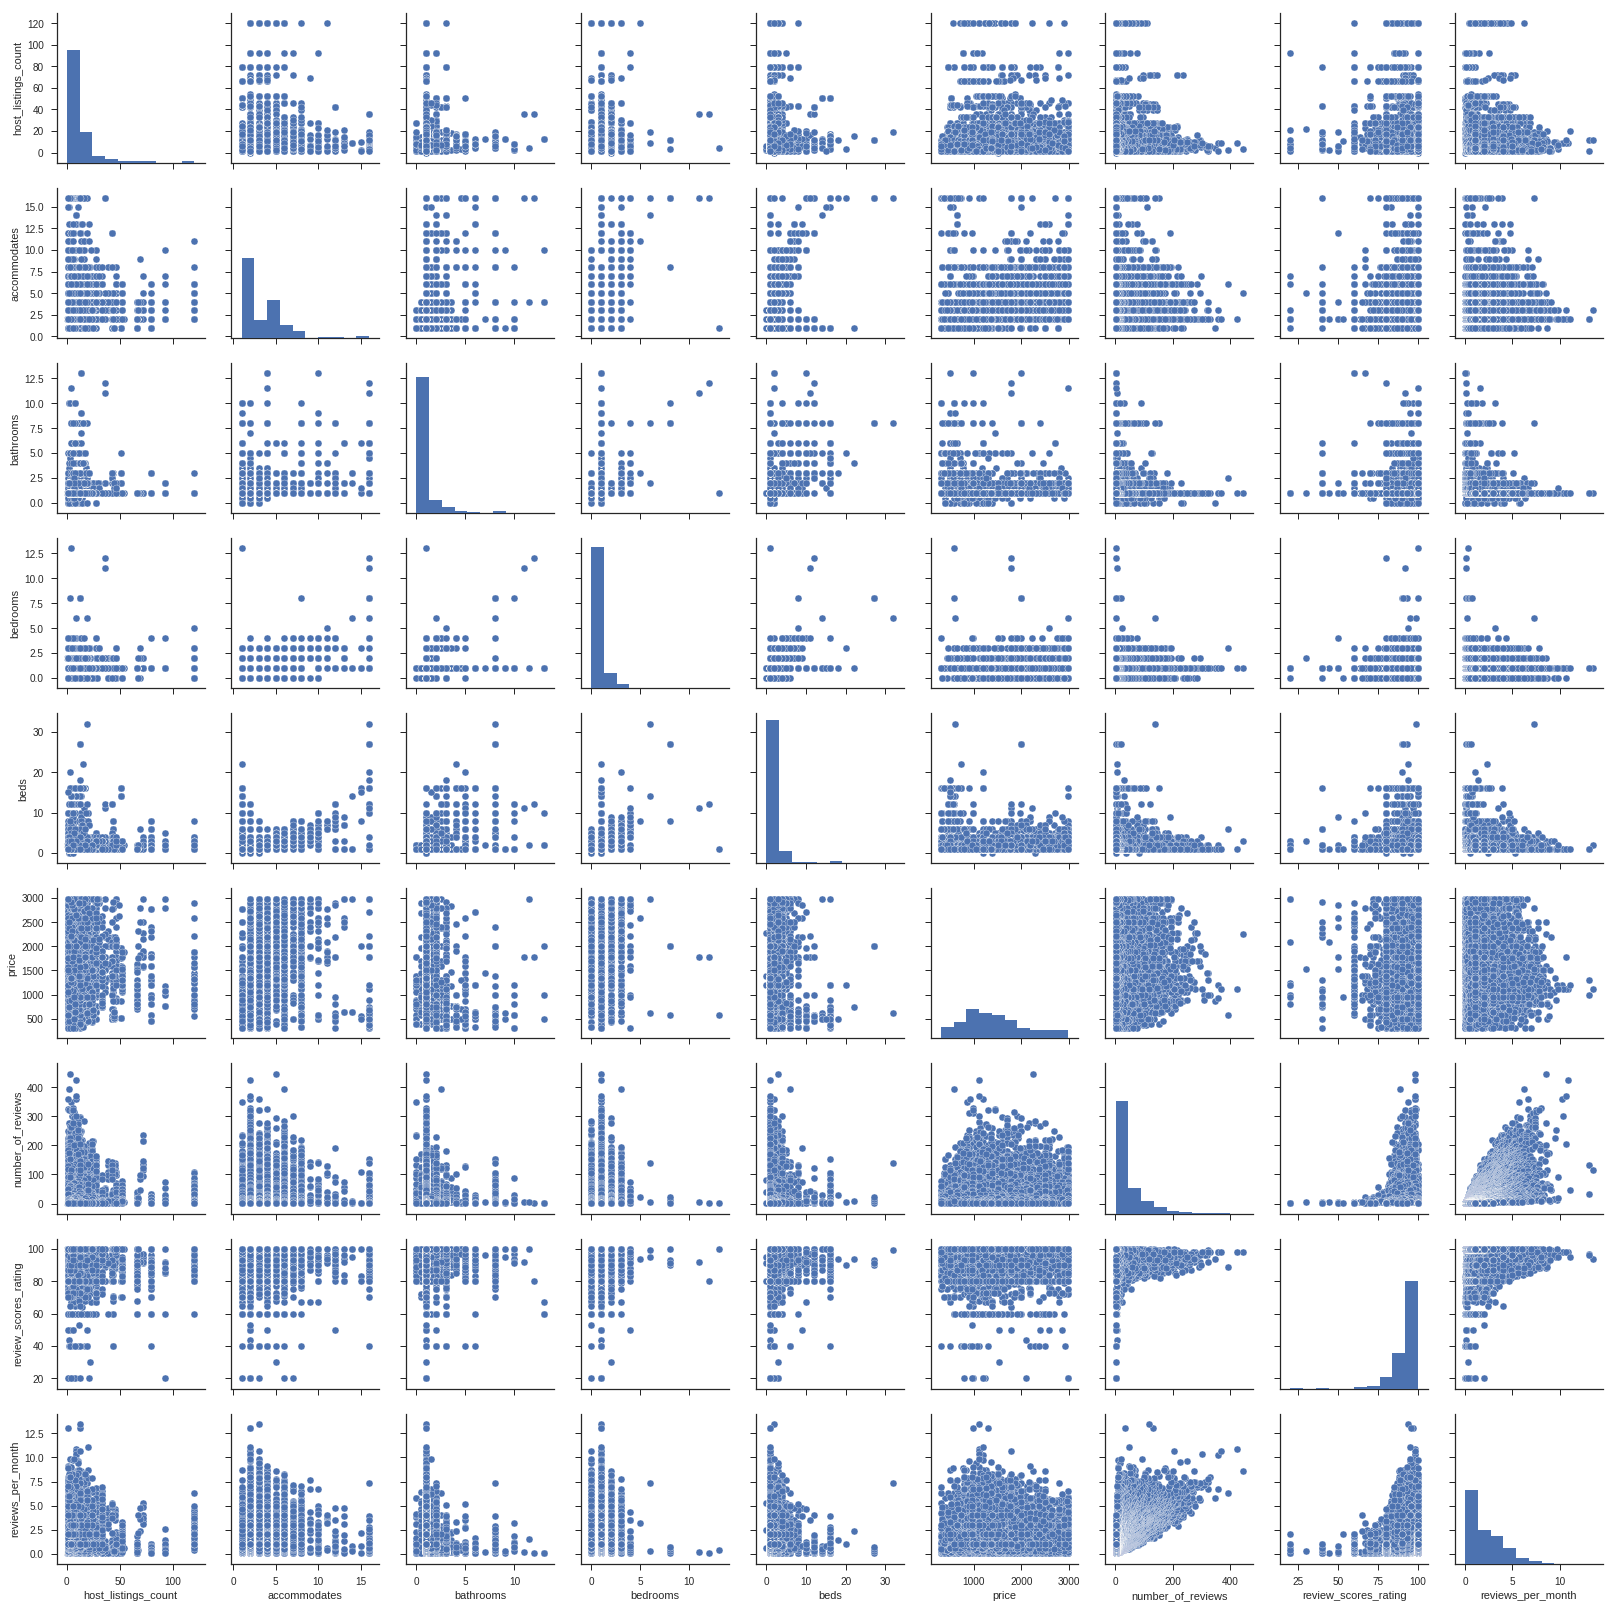

In [90]:
col = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']
sns.set(style="ticks", color_codes=True)
sns.pairplot(listings.loc[(listings.price <= 3000) & (listings.price > 0)][col].dropna())
plt.show();

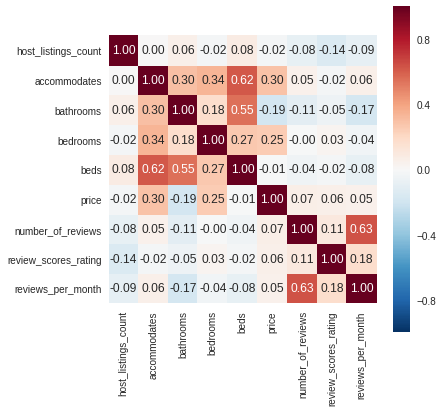

In [94]:
corr = listings.loc[(listings.price <= 3000) & (listings.price > 0)][col].dropna().corr()
plt.figure(figsize = (6,6))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

There are some not bad news such as number of bedrooms and accommodates seem to be correlated with price.

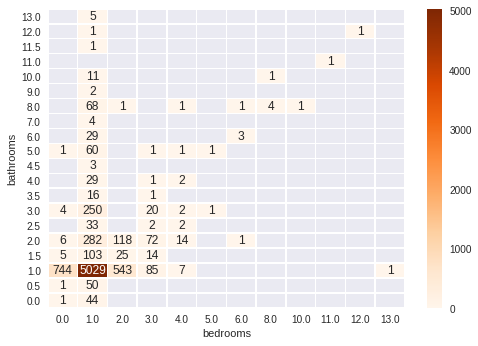

In [95]:
sns.heatmap(listings.loc[(listings.price <= 3000) & (listings.price > 0)]\
                .groupby(['bathrooms', 'bedrooms'])\
                .count()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Oranges", fmt='.0f', annot=True, linewidths=0.5)
plt.show();

Vast majority of listings have one bedroom and 1 bathroom.

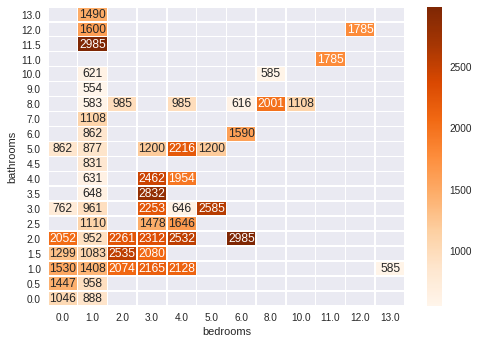

In [97]:
sns.heatmap(listings.loc[(listings.price <= 3000) & (listings.price > 0)]\
                .groupby(['bathrooms', 'bedrooms'])\
                .mean()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Oranges", fmt='.0f', annot=True, linewidths=0.5)
plt.show();

It looks like listings with 6 bedrooms and 2 bathrooms have the highest median price. But we must be skeptical about this finding because from the above single graph, we don't know how many listings in this category.

#### Modeling Lising Prices

In [98]:
listings = pd.read_csv('listings.csv.gz')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].astype(float)
listings = listings.loc[(listings.price <= 3000) & (listings.price > 0)]

In [0]:
listings.amenities = listings.amenities.str.replace("[{}]", "").str.replace('"', "")

In [101]:
listings.amenities.head()

0    TV,Cable TV,Internet,Wifi,Air conditioning,Whe...
1    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
2    TV,Cable TV,Internet,Wifi,Air conditioning,Pai...
3    TV,Cable TV,Internet,Wifi,Air conditioning,Pai...
4    Cable TV,Internet,Wifi,Air conditioning,Wheelc...
Name: amenities, dtype: object

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
amenities = count_vectorizer.fit_transform(listings['amenities'])
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())
df_amenities = df_amenities.drop('',1)

Replace the values in the following feature to 0 if "f", to 1 if "t".

In [0]:
columns =  ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']
for c in columns:
    listings[c] = listings[c].replace('f',0,regex=True)
    listings[c] = listings[c].replace('t',1,regex=True)

In [0]:
listings['security_deposit'] = listings['security_deposit'].fillna(value=0)
listings['security_deposit'] = listings['security_deposit'].replace( '[\$,)]','', regex=True ).astype(float)
listings['cleaning_fee'] = listings['cleaning_fee'].fillna(value=0)
listings['cleaning_fee'] = listings['cleaning_fee'].replace( '[\$,)]','', regex=True ).astype(float)

In [0]:
listings_new = listings[['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic','is_location_exact', 
                         'requires_license', 'instant_bookable', 'require_guest_profile_picture', 
                         'require_guest_phone_verification', 'security_deposit', 'cleaning_fee', 
                         'host_listings_count', 'host_total_listings_count', 'minimum_nights',
                     'bathrooms', 'bedrooms', 'guests_included', 'number_of_reviews','review_scores_rating', 'price']]

In [106]:
for col in listings_new.columns[listings_new.isnull().any()]:
    print(col)

bathrooms
bedrooms
review_scores_rating


In [107]:
for col in listings_new.columns[listings_new.isnull().any()]:
    listings_new[col] = listings_new[col].fillna(listings_new[col].median())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
for cat_feature in ['zipcode', 'property_type', 'room_type', 'cancellation_policy', 'neighbourhood_cleansed', 'bed_type']:
    listings_new = pd.concat([listings_new, pd.get_dummies(listings[cat_feature])], axis=1)

In [0]:
listings_new = pd.concat([listings_new, df_amenities], axis=1, join='inner')

End of Data prep

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

y = listings_new['price']
x = listings_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 429.312
R^2 test: 0.595


In [111]:
coefs_df = pd.DataFrame()

coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = rf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,est_int,coefs
120,Entire home/apt,0.15
15,guests_included,0.10
14,bedrooms,0.06
9,cleaning_fee,0.05
16,number_of_reviews,0.05
122,Shared room,0.03
17,review_scores_rating,0.03
12,minimum_nights,0.03
121,Private room,0.03
97,Boutique hotel,0.02


LightGBM

In [0]:
from lightgbm import LGBMRegressor

y = listings_new['price']
x = listings_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
fit_params={
    "early_stopping_rounds":20, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', 
            'categorical_feature': 'auto'
           }

In [0]:
class LGBMRegressor_GainFE(LGBMRegressor):
    @property
    def feature_importances_(self):
        if self._n_features is None:
            raise LGBMNotFittedError('No feature_importances found. Need to call fit beforehand.')
        return self.booster_.feature_importance(importance_type='gain')

In [114]:
clf = LGBMRegressor_GainFE(num_leaves= 25, max_depth=20, 
                         random_state=0, 
                         silent=True, 
                         metric='rmse', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.01)
clf.fit(X_train.values, y_train.values, **fit_params)

Training until validation scores don't improve for 20 rounds.
[100]	valid's rmse: 508.86
[200]	valid's rmse: 464.295
[300]	valid's rmse: 448.037
[400]	valid's rmse: 440.611
[500]	valid's rmse: 437.979
[600]	valid's rmse: 436.458
[700]	valid's rmse: 435.572
Early stopping, best iteration is:
[764]	valid's rmse: 435.083


LGBMRegressor_GainFE(boosting_type='gbdt', class_weight=None,
           colsample_bytree=0.9, importance_type='split',
           learning_rate=0.01, max_depth=20, metric='rmse',
           min_child_samples=20, min_child_weight=0.001,
           min_split_gain=0.0, n_estimators=1000, n_jobs=4, num_leaves=25,
           objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
           silent=True, subsample=0.9, subsample_for_bin=200000,
           subsample_freq=0)

In [117]:
y_pred = clf.predict(X_test.values)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

R^2 test: 0.584


Feature importance of LightGBM

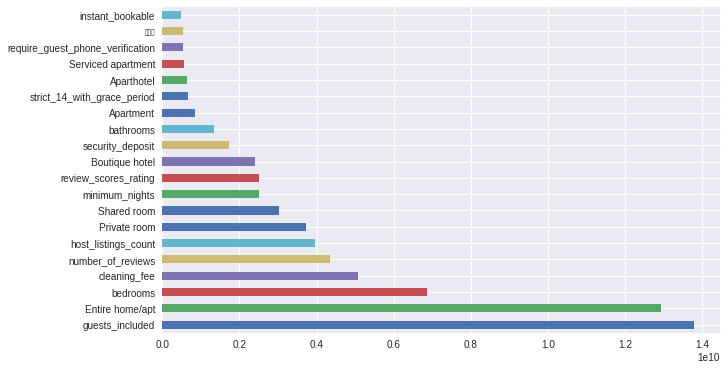

In [119]:
feat_imp = pd.Series(clf.feature_importances_, index=x.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10,6))